 Жмёте сначала на "Файл -> Создать копию на Диске", а потом в открывшемся окне меняете что надо поменять и жмёте на "Среда выполнения -> Выполнить всё"
 

In [ ]:
from google.colab import files
import pandas as pd
import io
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [ ]:
J1=620.32 #Это первая энергия ионизации, поменять на свою
J2=3800.83 #Это вторая энергия ионизации, поменять на свою
P=100.
T0=300
k=1.38*1e-23
n0=3.3*1e18 #Если у вас дана начальная концентрация, вот это тоже поменять
ge=2
g2=1


ga = 1 #Вот это статвес атома, его поменять на свой
g1 = 0.52 #Вот это статвес первого иона, тоже поменять на свой

Блоком ниже можно найти статвес, если вам оно надо, можете либо сами разобраться, либо мне написать, сейчас 3 часа ночи и мне влом всё расписывать

In [ ]:
def findG(fileName):
  file = files.upload()
  table = pd.read_csv(io.StringIO(file[fileName].decode('utf-8')), sep = ';', header=None)
  J = table[0]
  E = table[1]
  g = 0
  for i in range(J.size):
    g += (2*J[i]+1)*np.e**(-(E[i])/(0.5*8065.48))
  reurn g

#pr"имер table.csv))

0 n1\
1 n2\
2 ne\
3 na

In [ ]:
T = 0.5

def func(n):
  return [ge*g1/ga*n[3]/n[2]*(3*10**21*T**1.5)*np.exp(-J1/T)-n[0],
          ge*g2/g1*n[0]/n[2]*(3*10**21*T**1.5)*np.exp(-J2/T)-n[1],
          n[0]+2*n[1]-n[2],
          n0-(n[0]+n[1])-n[3]]

n=[1e+6,1,1e+6,1e+17]

sols = []
r = []
w = []
Ts = np.linspace(0.5, 2, 16, endpoint=True)

for T in Ts:
  root = fsolve(func, n)
  n = root
  print(root)
  sols.append(n.copy())
  r.append(740*np.sqrt(T/n[2]))
  w.append(5.6*1e4*np.sqrt(n[2]))
sols = np.array(sols)
r = np.array(r)
w = np.array(w)


[5.01790668e+13 2.77389403e+00 5.01790668e+13 3.29994982e+18]
[5.93214958e+14 1.22964734e+04 5.93214958e+14 3.29940679e+18]
[3.52405765e+15 5.13030032e+06 3.52405766e+15 3.29647594e+18]
[1.35748243e+16 4.86504880e+08 1.35748252e+16 3.28642518e+18]
[3.90510997e+16 1.71309646e+10 3.90511340e+16 3.26094888e+18]
[9.12485433e+16 3.00876673e+11 9.12491451e+16 3.20875116e+18]
[1.82541528e+17 3.18144893e+12 1.82547891e+17 3.11745529e+18]
[3.23543173e+17 2.29647132e+13 3.23589102e+17 2.97643386e+18]
[5.19962545e+17 1.23454119e+14 5.20209453e+17 2.77991400e+18]
[7.69938260e+17 5.25921554e+14 7.70990103e+17 2.52953582e+18]
[1.06266119e+18 1.85751138e+15 1.06637621e+18 2.23548130e+18]
[1.37889539e+18 5.62279856e+15 1.39014099e+18 1.91548181e+18]
[1.69348653e+18 1.49445877e+16 1.72337571e+18 1.59156888e+18]
[1.97920632e+18 3.54729171e+16 2.05015215e+18 1.28532077e+18]
[2.21075079e+18 7.60309854e+16 2.36281276e+18 1.01321822e+18]
[2.36797094e+18 1.48122669e+17 2.66421628e+18 7.83906388e+17]


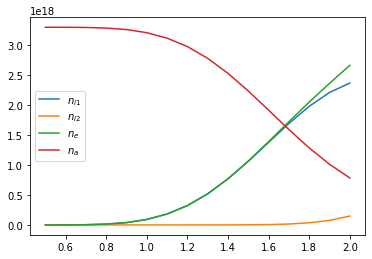

In [ ]:
labels = ["$n_{i1}$", "$n_{i2}$", "$n_e$", "$n_a$"]
for i in range(4):
  plt.plot(Ts, sols[:, i], label=labels[i])
plt.legend()


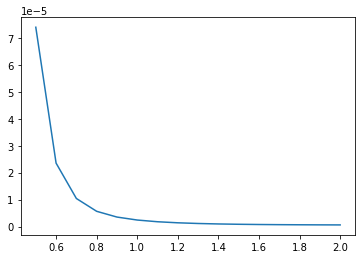

In [ ]:
plt.plot(Ts, r)

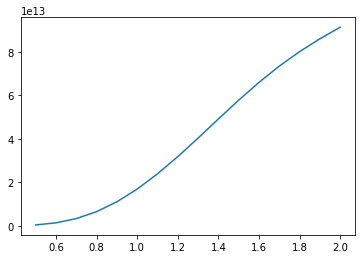

In [ ]:
plt.plot(Ts, w)